## Dataset

In [ ]:
# Sebastian HUARACA LAPA
# Nicole VERZA DOS SANTOS

import pandas as pd
caminho_arquivo = r"Data/medical_insurance.csv"
df = pd.read_csv(caminho_arquivo)
df

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,6266,50,Male,West,Urban,127200.0,No HS,Married,Employed,2,...,0,0,0,0,0,1,0,0,0,0
99996,54887,42,Male,East,Suburban,21600.0,HS,Married,Employed,2,...,0,0,0,0,0,0,0,0,0,0
99997,76821,41,Male,West,Rural,81900.0,HS,Divorced,Unemployed,1,...,0,0,0,1,0,1,0,0,0,0
99998,861,51,Female,South,Urban,43400.0,Doctorate,Single,Unemployed,3,...,0,0,1,0,0,2,2,1,0,0


## Descriptive analysis


In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Dataset dimensions:", df.shape)
print("\nData types:")
print(df.dtypes)

Dataset dimensions: (100000, 54)

Data types:
person_id                        int64
age                              int64
sex                             object
region                          object
urban_rural                     object
income                         float64
education                       object
marital_status                  object
employment_status               object
household_size                   int64
dependents                       int64
bmi                            float64
smoker                          object
alcohol_freq                    object
visits_last_year                 int64
hospitalizations_last_3yrs       int64
days_hospitalized_last_3yrs      int64
medication_count                 int64
systolic_bp                    float64
diastolic_bp                   float64
ldl                            float64
hba1c                          float64
plan_type                       object
network_tier                    object
deductible        

In [107]:
df=df.drop('person_id',axis=1)

In [108]:
num_vars = df.select_dtypes(include=['number']).columns
cat_vars = df.select_dtypes(exclude=['number']).columns
print("Variáveis numéricas:",len(num_vars), "\n",list(num_vars))
print("\n Variáveis categóricas:", len(cat_vars),"\n",list(cat_vars))

Variáveis numéricas: 43 
 ['age', 'income', 'household_size', 'dependents', 'bmi', 'visits_last_year', 'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c', 'deductible', 'copay', 'policy_term_years', 'policy_changes_last_2yrs', 'provider_quality', 'risk_score', 'annual_medical_cost', 'annual_premium', 'monthly_premium', 'claims_count', 'avg_claim_amount', 'total_claims_paid', 'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd', 'cardiovascular_disease', 'cancer_history', 'kidney_disease', 'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count', 'proc_surgery_count', 'proc_physio_count', 'proc_consult_count', 'proc_lab_count', 'is_high_risk', 'had_major_procedure']

 Variáveis categóricas: 10 
 ['sex', 'region', 'urban_rural', 'education', 'marital_status', 'employment_status', 'smoker', 'alcohol_freq', 'plan_type', 'network_tier']


In [109]:
print("NaN or missing data:")
print(df.isnull().sum())

NaN or missing data:
age                                0
sex                                0
region                             0
urban_rural                        0
income                             0
education                          0
marital_status                     0
employment_status                  0
household_size                     0
dependents                         0
bmi                                0
smoker                             0
alcohol_freq                   30083
visits_last_year                   0
hospitalizations_last_3yrs         0
days_hospitalized_last_3yrs        0
medication_count                   0
systolic_bp                        0
diastolic_bp                       0
ldl                                0
hba1c                              0
plan_type                          0
network_tier                       0
deductible                         0
copay                              0
policy_term_years                  0
policy_changes_la

<Axes: >

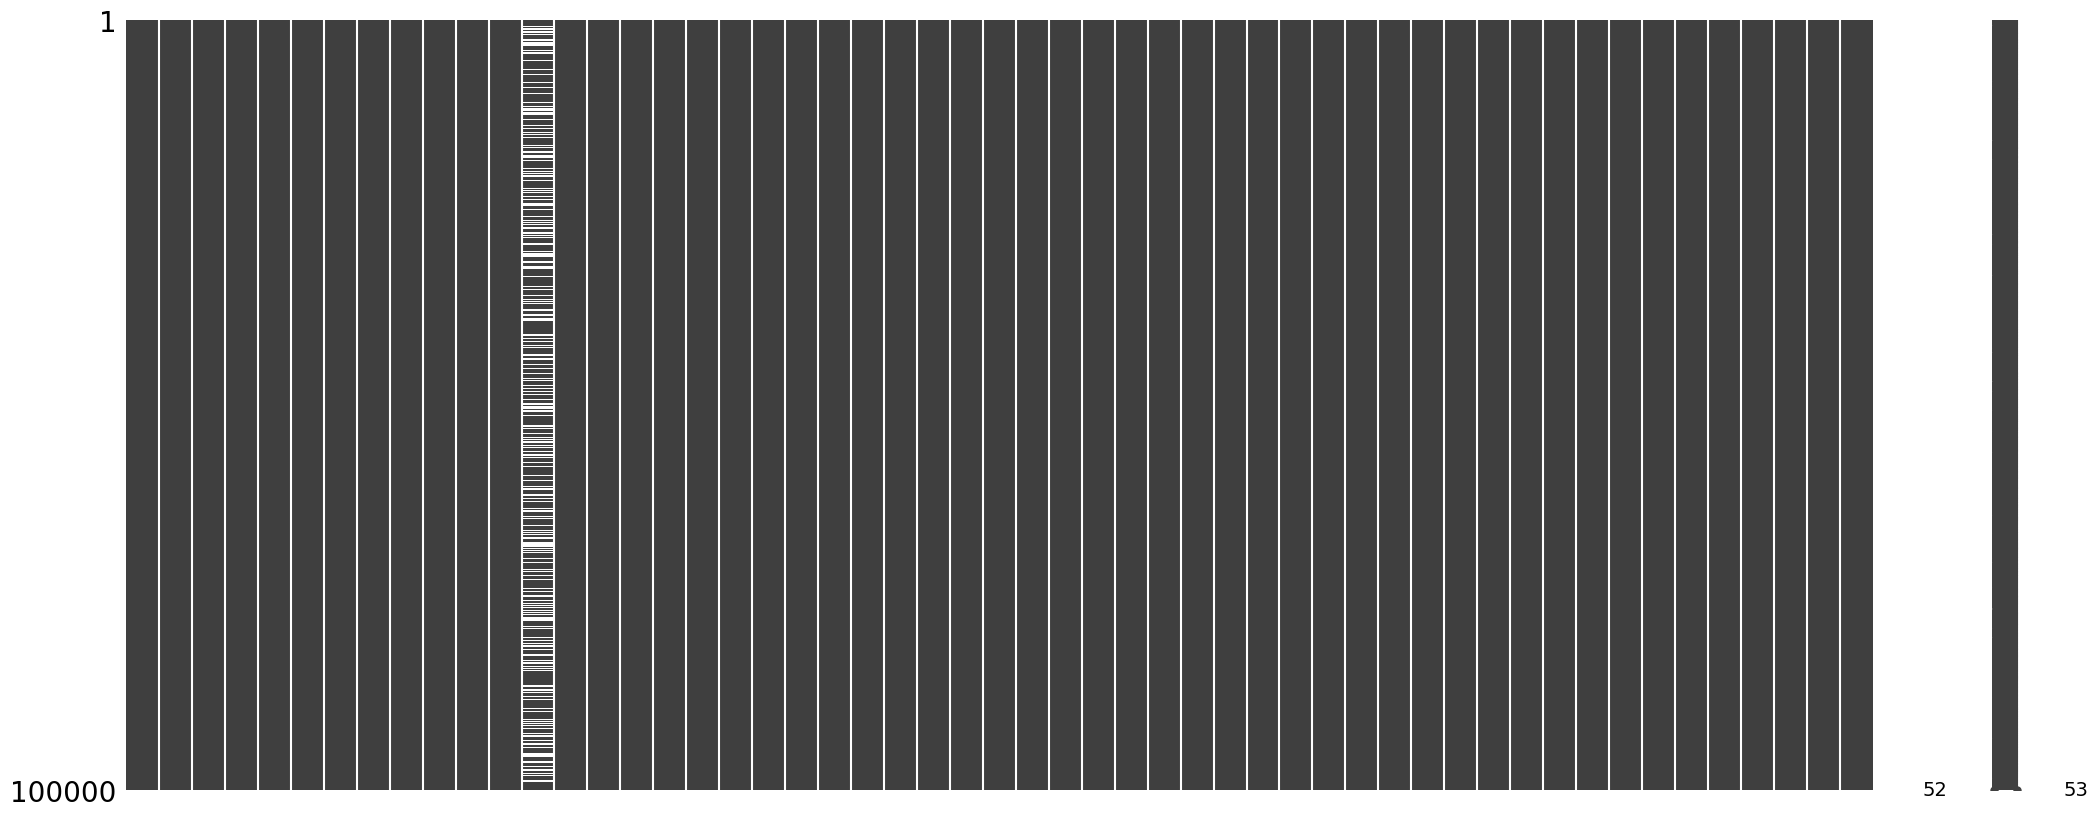

In [110]:
import missingno as msno

msno.matrix(df)

In [111]:

df['alcohol_freq'].unique()


array([nan, 'Weekly', 'Daily', 'Occasional'], dtype=object)

In [114]:
df_nan_alcohol_freq = df[df['alcohol_freq'].isna()].copy()
chronic_cols = [
    'hypertension', 'diabetes', 'asthma', 'copd', 'cardiovascular_disease',
    'cancer_history', 'kidney_disease', 'liver_disease', 'arthritis', 'mental_health'
]
df_nan_alcohol_freq['chronic_count'] = df_nan_alcohol_freq[chronic_cols].sum(axis=1)

df_nan_alcohol_freq['chronic_count'].describe()

count    30083.000000
mean         0.722102
std          0.803861
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: chronic_count, dtype: float64

Les valeurs manquantes de alcohol_freq concernent des individus globalement sains (moyenne de maladies chroniques = 0,72) ; nous les classons donc comme "Never"

In [115]:
df['alcohol_freq']=df['alcohol_freq'].fillna('Never')

In [117]:
print("NaN or missing data:")
print(df.isnull().sum())

NaN or missing data:
age                            0
sex                            0
region                         0
urban_rural                    0
income                         0
education                      0
marital_status                 0
employment_status              0
household_size                 0
dependents                     0
bmi                            0
smoker                         0
alcohol_freq                   0
visits_last_year               0
hospitalizations_last_3yrs     0
days_hospitalized_last_3yrs    0
medication_count               0
systolic_bp                    0
diastolic_bp                   0
ldl                            0
hba1c                          0
plan_type                      0
network_tier                   0
deductible                     0
copay                          0
policy_term_years              0
policy_changes_last_2yrs       0
provider_quality               0
risk_score                     0
annual_medical_cost   

<Axes: >

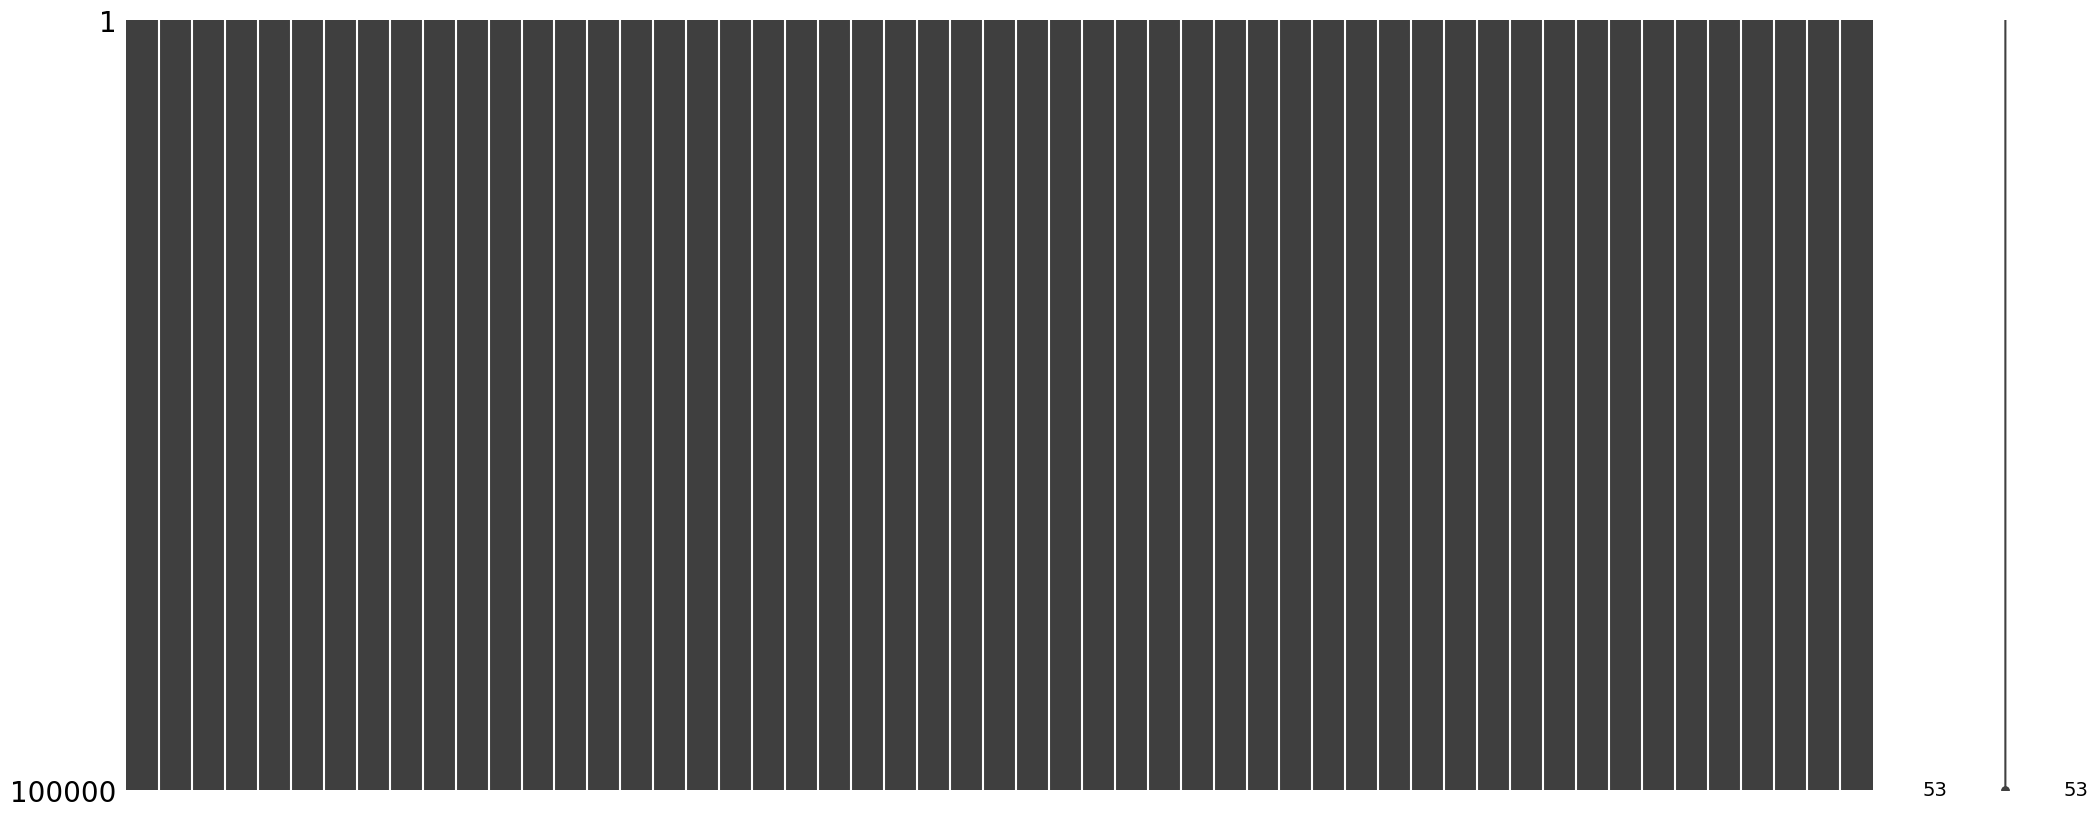

In [20]:
msno.matrix(df)

<Figure size 2500x2500 with 0 Axes>

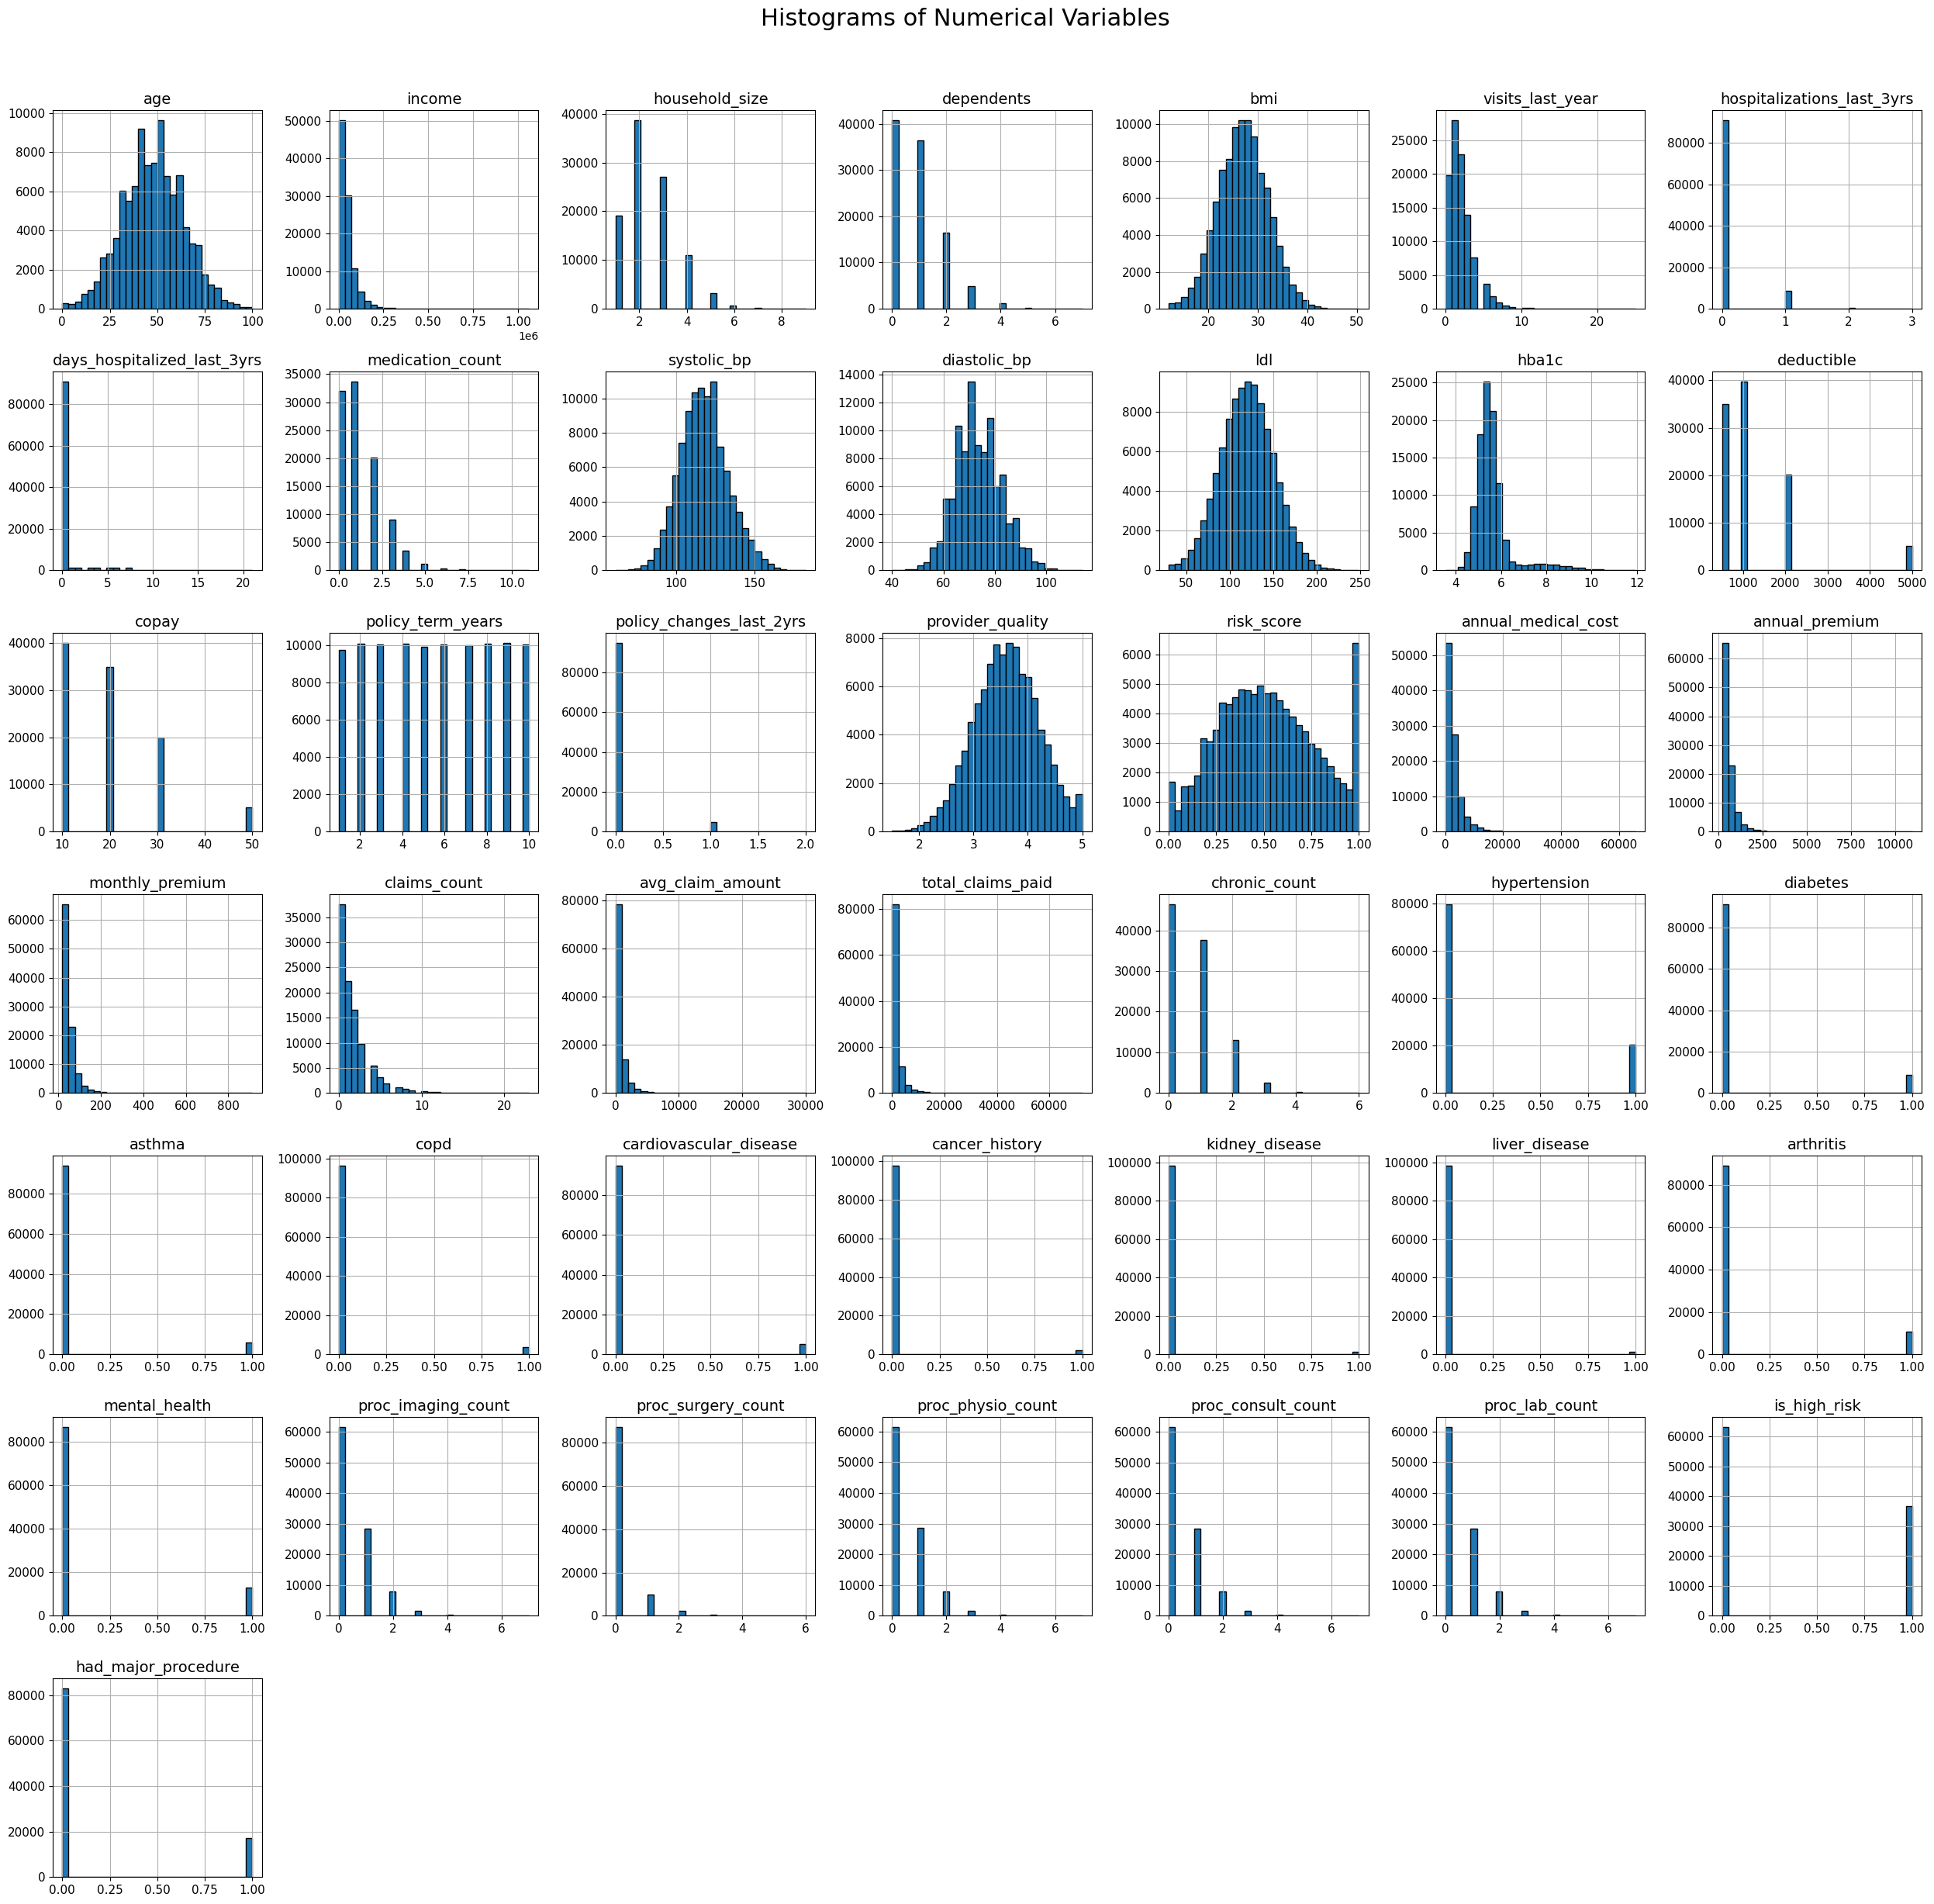

In [21]:
plt.figure(figsize=(25, 25))
df[num_vars].hist(
    bins=30,
    figsize=(25, 25),
    color="#1f77b4",
    edgecolor='black'
)
plt.suptitle("Histograms of Numerical Variables", fontsize=22)

for ax in plt.gcf().get_axes():
    ax.title.set_fontsize(14)
    ax.tick_params(axis='both', labelsize=11)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Models 

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

chronic_cols = [
    'hypertension', 'diabetes', 'asthma', 'copd', 'cardiovascular_disease',
    'cancer_history', 'kidney_disease', 'liver_disease', 'arthritis', 'mental_health'
]

df['risk_score_calc'] = df[chronic_cols].sum(axis=1)

def classify_risk(score):
    if score == 0:
        return 'low'
    elif score <= 2:
        return 'medium'
    else:
        return 'high'

df['health_risk_category'] = df['risk_score_calc'].apply(classify_risk)


features = [
    'age', 'sex', 'region', 'urban_rural', 'income', 'education',
    'marital_status', 'employment_status', 'household_size', 'dependents',
    'bmi', 'smoker', 'visits_last_year', 'hospitalizations_last_3yrs',
    'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp', 
    'diastolic_bp', 'ldl', 'hba1c', 'plan_type', 'network_tier', 'deductible',
    'copay', 'policy_term_years', 'policy_changes_last_2yrs', 'provider_quality',
    'proc_imaging_count', 'proc_surgery_count', 'proc_physio_count',
    'proc_consult_count', 'proc_lab_count', 'had_major_procedure'
]


# importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
# print("\nTop 10 features importantes:\n", importances.head(10))


In [ ]:
#ML preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df[features]
y = df['health_risk_category']

# var cat
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
len(X_train_scaled)

80000

In [60]:
y_train

75220       low
48955    medium
44966    medium
13568       low
92727       low
          ...  
6265     medium
54886    medium
76820    medium
860      medium
15795       low
Name: health_risk_category, Length: 80000, dtype: object

In [61]:
y.isna().sum()  #checking if there is NaN

0

In [ ]:
# from imblearn.over_sampling import SMOTE

# # balance the data
# smote = SMOTE(random_state=42)
# X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# print(len(X_train_bal), len(y_train_bal))

121620 121620


In [ ]:
# from imblearn.over_sampling import SMOTE

# sm = SMOTE(sampling_strategy={0: 3000})
# x_train_res, y_train_res = sm.fit_resample(x_train, y_train)


## GridSearchCV et RandomizedSearchCV ##

In [26]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def grid(x_train,y_train, clf,param_grid):
    
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(x_train, y_train)  
    best_params = grid_search.best_params_
    print("Melhores parâmetros encontrados:", best_params)
    best_model = grid_search.best_estimator_
    
    return best_model
    
def randomized(x_train, y_train, clf, param_dist, n_iter=50):
    
    random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter, cv=5,
        scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)

    random_search.fit(x_train, y_train)

    best_params = random_search.best_params_
    print("Melhores parâmetros encontrados:", best_params)
    
    best_model = random_search.best_estimator_

    return best_model


### Random Forest ###

In [121]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

clf = RandomForestClassifier(random_state=42)

params_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
#Grid Search
# best_rf_grid = grid(X_train,y_train, clf,params_rf)

#Randomized
best_rf_random = randomized(X_train,y_train, clf,params_rf)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Melhores parâmetros encontrados: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None}


              precision    recall  f1-score   support

        high       0.83      0.15      0.25       560
         low       0.77      0.81      0.79      9290
      medium       0.78      0.78      0.78     10150

    accuracy                           0.77     20000
   macro avg       0.79      0.58      0.61     20000
weighted avg       0.78      0.77      0.77     20000



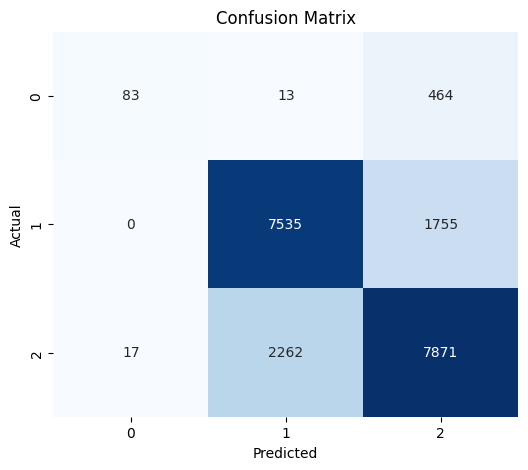

In [ ]:
#random forest test model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

best_rf_random.fit(X_train, y_train)
y_pred = best_rf_random.predict(X_test)

print(classification_report(y_test, y_pred))

cm=confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### XGBoost ###

In [118]:
from xgboost import XGBClassifier
from scipy.stats import randint, uniform
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

xgb = XGBClassifier(objective='multi:softmax', random_state=42)

param_dist_xgb = {
    'n_estimators': randint(200, 800),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
}

best_xgb_random = randomized(X_train,y_train_enc, xgb,param_dist_xgb)  

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Melhores parâmetros encontrados: {'colsample_bytree': 0.8273234413341887, 'learning_rate': 0.028734953565618497, 'max_depth': 5, 'n_estimators': 669, 'subsample': 0.7060809470726902}


In [119]:
from xgboost import XGBClassifier

# With GridSearchCV
#xgboost
le = LabelEncoder()

y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
xgb = XGBClassifier(objective='multi:softprob', random_state=42)

xgb_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

best_xgb_grid = grid(X_train,y_train, xgb,xgb_params)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Melhores parâmetros encontrados: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.6}


              precision    recall  f1-score   support

           0       0.71      0.32      0.44       560
           1       0.76      0.83      0.80      9290
           2       0.80      0.76      0.78     10150

    accuracy                           0.78     20000
   macro avg       0.76      0.64      0.67     20000
weighted avg       0.78      0.78      0.78     20000



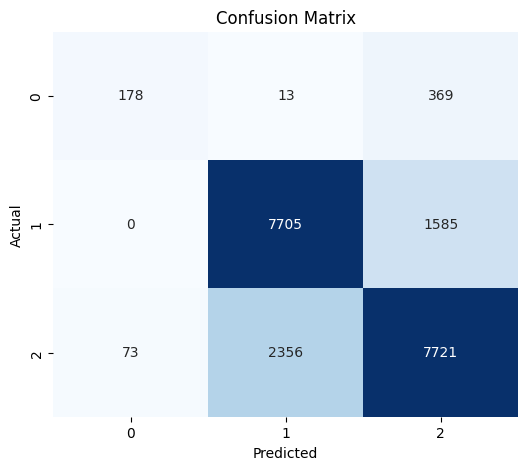

In [ ]:
best_xgb_random.fit(X_train, y_train_enc)

previsoes_xg = best_xgb_random.predict(X_test)

report = classification_report(y_test_enc, previsoes_xg)
cm = confusion_matrix(y_test_enc, previsoes_xg)
print(report)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Logistic Regression ###

In [ ]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

#with RandomizedSearchCV
#Logistic Regression

lr = LogisticRegression(max_iter=1000)
param = {
    'C': uniform(0.01, 10),
    'solver': ['liblinear', 'lbfgs']
}
# Grid Search
# best_lr_random = grid(X_train, y_train, lr,param)

#Randomized
best_lr_random = randomized(X_train, y_train, lr,param)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Melhores parâmetros encontrados: {'C': 4.329450186421157, 'solver': 'liblinear'}


C:\Users\nicol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nicol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nicol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        high       0.00      0.00      0.00       560
         low       0.73      0.77      0.75      9290
      medium       0.74      0.74      0.74     10150

    accuracy                           0.74     20000
   macro avg       0.49      0.51      0.50     20000
weighted avg       0.72      0.74      0.73     20000



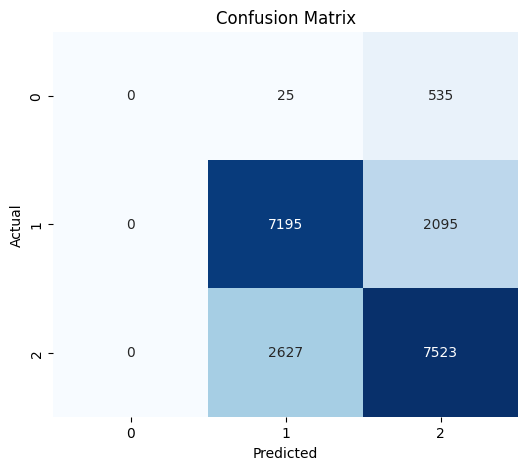

In [ ]:
#Logistic Regression
best_lr_random.fit(X_train, y_train)

previsoes_lr = best_lr_random.predict(X_test)

report = classification_report(y_test, previsoes_lr)
cm = confusion_matrix(y_test, previsoes_lr)
print(report)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree ###

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)

dt_param = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Grid Search
# best_dt_grid = grid(X_train, X_test, y_train, y_test, dt_clf, dt_param)

# Randomized 
best_dt_random = randomized(X_train, y_train, dt_clf, dt_param)



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Melhores parâmetros encontrados: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'entropy'}


              precision    recall  f1-score   support

        high       0.56      0.22      0.32       560
         low       0.74      0.82      0.78      9290
      medium       0.78      0.72      0.75     10150

    accuracy                           0.76     20000
   macro avg       0.69      0.59      0.62     20000
weighted avg       0.75      0.76      0.75     20000



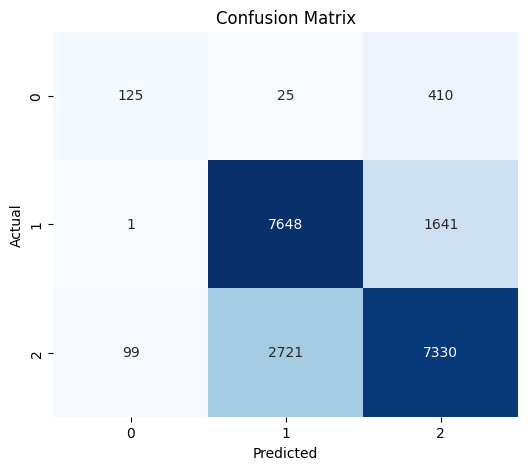

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Decision Tree test
best_dt_random.fit(X_train, y_train)

y_pred = best_dt_random.predict(X_test)

print(classification_report(y_test, y_pred))

cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### PyTorch MLP

In [88]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)
X = pd.get_dummies(X, drop_first=True)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [75]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split

class TabularDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [ ]:
full_train_dataset = TabularDataset(X_train_scaled, y_train)
test_dataset = TabularDataset(X_test_scaled, y_test)

In [92]:
val_size = int(0.2 * len(full_train_dataset))
train_size = len(full_train_dataset) - val_size
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [95]:
import torch.nn as nn
import numpy as np

input_dim = X_train_scaled.shape[1]
num_classes = len(np.unique(y_train))

class MLP(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        return self.model(x)

In [96]:
model = MLP(input_dim, num_classes)

In [97]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.9)


In [98]:
epochs = 30

for epoch in range(epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss/len(train_loader):.4f} | Val Loss: {val_loss/len(val_loader):.4f}")

Epoch 1/30 | Train Loss: 0.5404 | Val Loss: 0.5269
Epoch 2/30 | Train Loss: 0.5167 | Val Loss: 0.5112
Epoch 3/30 | Train Loss: 0.5114 | Val Loss: 0.5107
Epoch 4/30 | Train Loss: 0.5096 | Val Loss: 0.5106
Epoch 5/30 | Train Loss: 0.5059 | Val Loss: 0.5125
Epoch 6/30 | Train Loss: 0.5060 | Val Loss: 0.5241
Epoch 7/30 | Train Loss: 0.5056 | Val Loss: 0.5363
Epoch 8/30 | Train Loss: 0.5028 | Val Loss: 0.5188
Epoch 9/30 | Train Loss: 0.5007 | Val Loss: 0.5371
Epoch 10/30 | Train Loss: 0.4999 | Val Loss: 0.5187
Epoch 11/30 | Train Loss: 0.4986 | Val Loss: 0.5298
Epoch 12/30 | Train Loss: 0.4976 | Val Loss: 0.5238
Epoch 13/30 | Train Loss: 0.4959 | Val Loss: 0.5187
Epoch 14/30 | Train Loss: 0.4937 | Val Loss: 0.5382
Epoch 15/30 | Train Loss: 0.4913 | Val Loss: 0.5155
Epoch 16/30 | Train Loss: 0.4919 | Val Loss: 0.5201
Epoch 17/30 | Train Loss: 0.4928 | Val Loss: 0.5329
Epoch 18/30 | Train Loss: 0.4917 | Val Loss: 0.5320
Epoch 19/30 | Train Loss: 0.4884 | Val Loss: 0.5430
Epoch 20/30 | Train L

              precision    recall  f1-score   support

           0       0.65      0.21      0.31       556
           1       0.72      0.88      0.79      9306
           2       0.82      0.68      0.74     10138

    accuracy                           0.76     20000
   macro avg       0.73      0.59      0.62     20000
weighted avg       0.77      0.76      0.75     20000



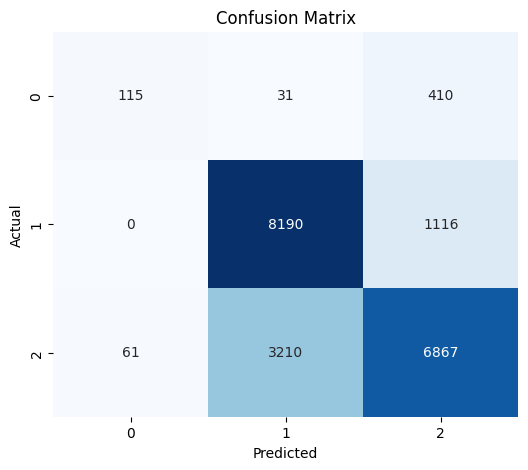

In [120]:
from sklearn.metrics import classification_report, confusion_matrix

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        preds = torch.argmax(outputs, dim=1)
        y_true.extend(y_batch.numpy())
        y_pred.extend(preds.numpy())

print(classification_report(y_true, y_pred))

cm=confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()